In [41]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

In [42]:
price_start = 120000
annual_increase = 0.05
years = 5

In [43]:
annual_interest = 0.12
capitalisation_periods = 12
months_period = years * 12

In [44]:
property_price_in_5_years = price_start * (1 + annual_increase)**years

In [45]:
print("Estimated property price in 5 years:", round(property_price_in_5_years, 2), "PLN")

Estimated property price in 5 years: 153153.79 PLN


#### Orientacyjna cena mieszkania za 5 lat: 153153.79 PLN

In [46]:
monthly_interest = annual_interest / capitalisation_periods

In [47]:
monthly_payment = npf.pmt(rate=monthly_interest, nper=months_period, pv=0, fv=property_price_in_5_years, when='end')
monthly_payment = -monthly_payment

In [48]:
print("Monthly payment:", round(monthly_payment, 2), "PLN")

Monthly payment: 1875.28 PLN


#### Miesieczna wplata: 1875.28 PLN

In [49]:
months = np.arange(months_period + 1)
property_price_monthly = price_start * ((property_price_in_5_years / price_start) ** (months / months_period))

In [50]:
deposit = np.zeros(months_period + 1)
for m in range(1, months_period + 1):
    deposit[m] = deposit[m-1]*(1+monthly_interest) + monthly_payment

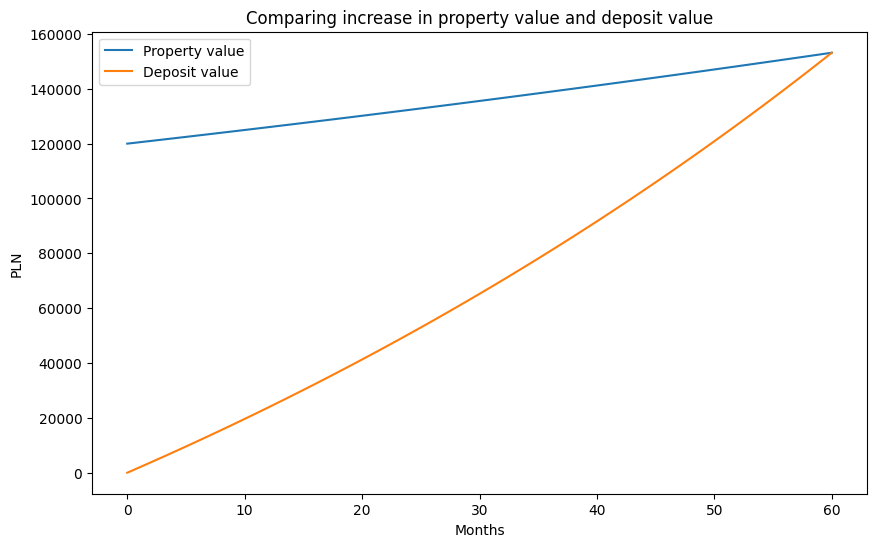

In [52]:
plt.figure(figsize=(10,6))
plt.plot(months, property_price_monthly, label="Property value")
plt.plot(months, deposit, label="Deposit value")
plt.xlabel("Months")
plt.ylabel("PLN")
plt.title("Comparing increase in property value and deposit value")
plt.legend()
plt.show()